In [1]:
#importing the various libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('TimeSeries_TotalSolarGen_and_Load_IT_2016.csv')

First, we can get an idea of the data by looking at the first and last few entries.

In [3]:
data.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


In [4]:
data.tail()

,utc_timestamp,IT_load_new,IT_solar_generation
8779,2016-12-31T19:00:00Z,31154.0,0
8780,2016-12-31T20:00:00Z,28342.0,0
8781,2016-12-31T21:00:00Z,26496.0,0
8782,2016-12-31T22:00:00Z,25276.0,0
8783,2016-12-31T23:00:00Z,23663.0,0


First, the 'IT_load_new' and 'IT_solar_generation' columns are renamed to 'load(MW)' and 'solar_generation(MW)' 

In [5]:
data.columns = ['utc_timestamp','Load(MW)','Solar_Generation(MW)']

It can be seen that the utc_timestamp column is of the format Year,Month,Date,Hours,Minutes and Seconds. Using pandas, this can be split into two (Year,Month,Date and Hours,Minutes,Seconds)

In [6]:
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])
data['date'] = [data.date() for data in data['utc_timestamp']]
data['time'] = [data.time() for data in data['utc_timestamp']]

Now, looking at the data again

In [7]:
data.head()

,utc_timestamp,Load(MW),Solar_Generation(MW),date,time
0,2016-01-01 00:00:00,21665.0,1,2016-01-01,00:00:00
1,2016-01-01 01:00:00,20260.0,0,2016-01-01,01:00:00
2,2016-01-01 02:00:00,19056.0,0,2016-01-01,02:00:00
3,2016-01-01 03:00:00,18407.0,0,2016-01-01,03:00:00
4,2016-01-01 04:00:00,18425.0,0,2016-01-01,04:00:00


The 'utc_timestamp' column can now be removed and the columns can be rearranged so that the 'date' and 'time' column are on the left

In [8]:
data = data.drop('utc_timestamp',axis=1)
data = data[['date','time','Load(MW)','Solar_Generation(MW)']]

Now, some analysis can be done

1.The day with highest demand (highest Load)

In [9]:
data.loc[data['Load(MW)'].idxmax()]

date                    2016-07-12
time                      12:00:00
Load(MW)                     48986
Solar_Generation(MW)          8245
Name: 4644, dtype: object

2.The day with highest Solar Generation

In [10]:
data.loc[data['Solar_Generation(MW)'].idxmax()]

date                    2016-10-29
time                      11:00:00
Load(MW)                     27801
Solar_Generation(MW)         15824
Name: 7259, dtype: object

Similarly, the minimum demand and solar power generation can also be found out using idxmin() 

The difference in supply and demand can be calculated and a new column named 'Difference' can be added to the dataframe

In [11]:
data['Difference'] = data['Load(MW)'] - data['Solar_Generation(MW)']

The highest difference between load and solar generation can now be found out:

In [12]:
data.loc[data['Difference'].idxmax()]

date                    2016-12-14
time                      16:00:00
Load(MW)                     48706
Solar_Generation(MW)             0
Difference                   48706
Name: 8368, dtype: object

Now, time will be considered as index, with 24 rows and each row corresponding to an hour of the day. This will make analysis of data with respect to the hour of the day easier. Also, date will be considered as columns

In [13]:
new_data = data.pivot(index ='time',columns='date')
new_data.head()

Load(MW)                                                         \
date     2016-01-01 2016-01-02 2016-01-03 2016-01-04 2016-01-05 2016-01-06   
time                                                                         
00:00:00    21665.0    19651.0    20156.0    19872.0    22224.0    22129.0   
01:00:00    20260.0    18679.0    19200.0    19023.0    21217.0    21058.0   
02:00:00    19056.0    18264.0    18603.0    18745.0    20986.0    20533.0   
03:00:00    18407.0    18346.0    18456.0    19110.0    21203.0    20421.0   
04:00:00    18425.0    19236.0    18917.0    20513.0    22496.0    20760.0   

                                                        ...     Difference  \
date     2016-01-07 2016-01-08 2016-01-09 2016-01-10    ...     2016-12-22   
time                                                    ...                  
00:00:00    21226.0    23911.0    23648.0    22002.0    ...        25847.0   
01:00:00    20395.0    23010.0    22678.0    20712.0    ...        24751.0   
02:00:00    20269.0    22594.0    22337.0    20142.0    ...        24532.0   
03:00:00    20728.0    23020.0    22351.0    20147.0    ...        24821.0   
04:00:00    22606.0    24660.0    22910.0    20548.0    ...        26667.0   

                                                                            \
date     2016-12-23 2016-12-24 2016-12-25 2016-12-26 2016-12-27 2016-12-28   
time                                                                         
00:00:00    25310.0    22599.0    20838.0    18650.0    19300.0    21209.0   
01:00:00    24176.0    21309.0    19194.0    17895.0    18454.0    20403.0   
02:00:00    23880.0    20677.0    18272.0    17493.0    18217.0    20226.0   
03:00:00    24152.0    20362.0    17874.0    17505.0    18467.0    20342.0   
04:00:00    25759.0    21190.0    18182.0    18106.0    20026.0    21586.0   

                                           
date     2016-12-29 2016-12-30 2016-12-31  
time                                       
00:00:00    21540.0    21536.0    21363.0  
01:00:00    20623.0    20566.0    20211.0  
02:00:00    20214.0    20225.0    19737.0  
03:00:00    20380.0    20522.0    19772.0  
04:00:00    21736.0    21824.0    20576.0  

[5 rows x 1098 columns]

Some visualizations:

1.Difference in load and generated power

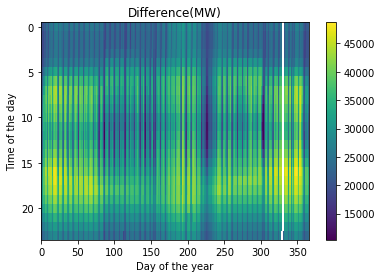

In [14]:
plt.imshow(new_data['Difference'],aspect='auto')
plt.colorbar()
plt.xlabel('Day of the year')
plt.ylabel('Time of the day')
plt.title('Difference(MW)')

It can be seen that the difference is high particularly during the first 3 months (day0-75) and the last 2 months(day300-360)

2.Solar power generated throughout the year

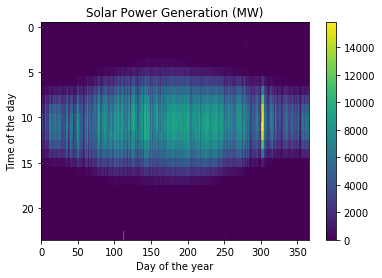

In [15]:
plt.imshow(new_data['Solar_Generation(MW)'],aspect='auto')
plt.colorbar()
plt.xlabel('Day of the year')
plt.ylabel('Time of the day')
plt.title('Solar Power Generation (MW)')

The solar power generation shows a trend of starting at around 5:00 hrs and going out at around 16:00 hrs. However, there is a day (around the 300th day), where solar power generation was at its peak. This was on the 29th of October 2016, as it was found in the initial analysis done above.

3.Power demand throughout the year

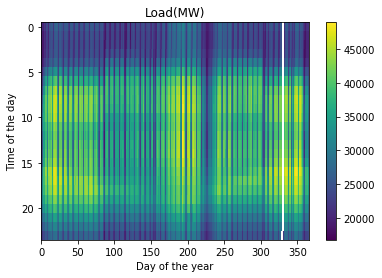

In [16]:
plt.imshow(new_data['Load(MW)'],aspect='auto')
plt.colorbar()
plt.xlabel('Day of the year')
plt.ylabel('Time of the day')
plt.title('Load(MW)')

It can be seen that the load is at its peak between 5:00 hrs and 20:00 hrs. Seasonal changes in the load can also be noticed around the period of day 75-150 when the load is comparetively low. Also, there appears to be some missing data around day 325.